# PROJECT TITLE

Credit Card Fraud Detection Using Machine Learning: A Predictive Model for Enhancing Transaction Security

# PROBLEM STATEMENT

With the rise of digital transactions, credit card fraud has become a significant concern for financial institutions and consumers. Detecting fraudulent transactions in real-time is crucial to prevent financial losses and enhance the security of online transactions. Traditional methods of fraud detection, relying heavily on manual reviews or rule-based systems, are increasingly inadequate due to the evolving tactics of fraudsters. This project aims to develop a machine learning-based predictive model that can accurately detect potential credit card fraud by analyzing transaction patterns. The model will be trained on historical credit card transaction data and will be capable of distinguishing between legitimate and fraudulent transactions, providing financial institutions with a powerful tool for early fraud detection. The goal is to improve the accuracy and speed of fraud detection, reducing false positives while maintaining the security and integrity of credit card transactions.

In [3]:
# Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
# Check the dataset

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
#Distribution of legit transactions and fradulent transactions

# 0 - Normal Transactions
# 1 - Fradulent Transactions

In [9]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [11]:
# Number of normal transactions is more than the fraud transactions. This is an unbalanced data. It is wiser to bring the legit trasaction to the same sample size as that of a fraud ones for better model training and prediction.
# Use Undersampling

In [24]:
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]
print(legit)
print(fraud)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [25]:
legit_sample = legit.sample(n = 492)
legit_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
210514,138014.0,2.021141,-1.292322,-3.275945,-2.878191,0.288553,-1.307479,0.623618,-0.559529,0.131115,...,0.068411,0.584438,-0.360850,0.275126,0.862320,-0.411712,-0.044149,-0.062828,157.88,0
121795,76322.0,1.107307,-0.085294,1.128562,1.447412,-1.054858,-0.502308,-0.408009,0.025261,0.839261,...,0.117710,0.504769,-0.111344,0.741132,0.582673,-0.236599,0.053110,0.035891,29.95,0
56635,47516.0,-2.377184,2.148725,0.245236,-0.418986,-0.600757,0.157286,-0.368551,1.317751,0.103309,...,-0.200454,-0.466032,0.194952,-0.353101,-0.099179,0.143304,0.558594,0.300080,8.92,0
2984,2535.0,-0.493222,0.357311,-1.384772,-2.241422,1.886006,2.996301,-0.131764,1.115554,-1.946693,...,0.262682,0.274950,0.009078,0.939666,-0.006393,-0.243687,-0.008077,0.105250,85.25,0
83157,59714.0,-1.612937,2.658513,-1.054838,0.784707,-0.490120,-1.309890,0.173291,0.765848,-0.328242,...,0.107277,0.625893,0.165913,0.414034,-0.414386,-0.422769,0.328688,0.063821,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47445,43213.0,-2.131999,-1.809920,0.544798,0.431819,-0.714176,0.248286,2.548084,-0.298166,0.212803,...,0.356546,0.032728,1.267115,-0.253875,0.563690,0.458068,-0.351005,-0.035576,676.16,0
102912,68424.0,-2.630512,-1.533031,1.576118,0.569064,1.483948,-0.375641,-0.970711,0.099595,0.634036,...,-0.181498,0.608009,-1.011967,-0.157790,-0.941448,-0.641185,0.618339,-0.106681,171.10,0
174557,121967.0,1.789550,-0.556617,-1.534874,0.343963,0.202157,0.118209,-0.227615,-0.003945,0.972636,...,-0.307981,-1.132447,0.184282,-0.424180,-0.503949,0.134031,-0.049449,0.006778,157.51,0
73323,55084.0,1.351219,-0.313144,0.145768,-0.717161,-0.708570,-0.921292,-0.133811,-0.231144,-1.497740,...,-0.739943,-1.735977,0.260980,0.328022,-0.017115,0.602792,-0.075613,0.001650,16.99,0


In [26]:
fraud_sample = fraud = df[df['Class'] == 1]
fraud_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [30]:
new_df = pd.concat([legit_sample, fraud_sample], axis = 0)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
210514,138014.0,2.021141,-1.292322,-3.275945,-2.878191,0.288553,-1.307479,0.623618,-0.559529,0.131115,...,0.068411,0.584438,-0.360850,0.275126,0.862320,-0.411712,-0.044149,-0.062828,157.88,0
121795,76322.0,1.107307,-0.085294,1.128562,1.447412,-1.054858,-0.502308,-0.408009,0.025261,0.839261,...,0.117710,0.504769,-0.111344,0.741132,0.582673,-0.236599,0.053110,0.035891,29.95,0
56635,47516.0,-2.377184,2.148725,0.245236,-0.418986,-0.600757,0.157286,-0.368551,1.317751,0.103309,...,-0.200454,-0.466032,0.194952,-0.353101,-0.099179,0.143304,0.558594,0.300080,8.92,0
2984,2535.0,-0.493222,0.357311,-1.384772,-2.241422,1.886006,2.996301,-0.131764,1.115554,-1.946693,...,0.262682,0.274950,0.009078,0.939666,-0.006393,-0.243687,-0.008077,0.105250,85.25,0
83157,59714.0,-1.612937,2.658513,-1.054838,0.784707,-0.490120,-1.309890,0.173291,0.765848,-0.328242,...,0.107277,0.625893,0.165913,0.414034,-0.414386,-0.422769,0.328688,0.063821,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [31]:
new_df.shape

(984, 31)

In [ ]:
# Handling null values

In [32]:
new_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# Exploratory Data Analysis

In [ ]:
# Checking the correlation between the variables

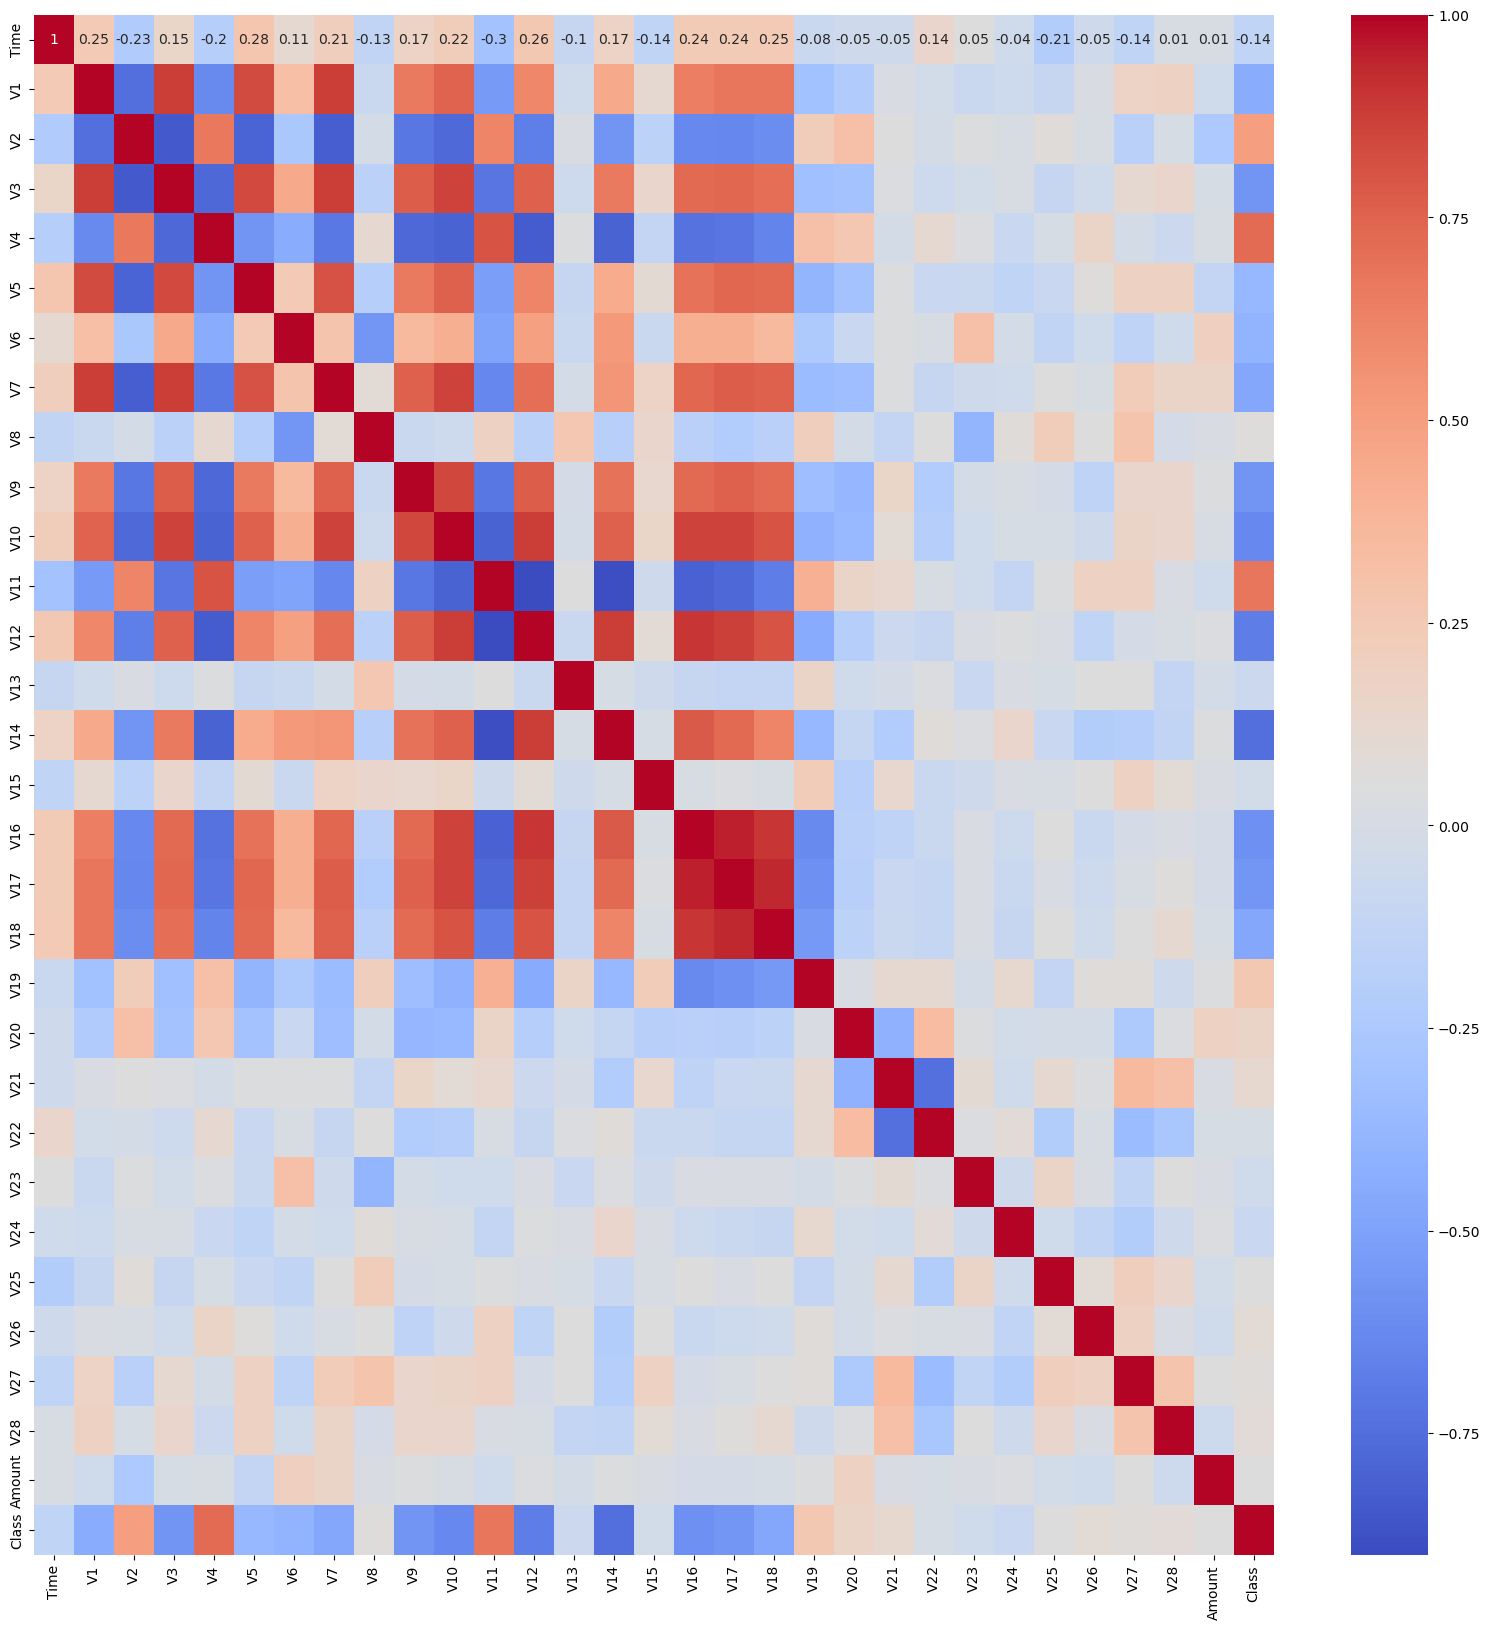

In [33]:
plt.figure(figsize = (20,20))
sns.heatmap(new_df.corr().round(2), annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
# Sorting out relevant columns and removing the outliers

In [35]:
imp_col = ['V11', 'V4', 'V2', 'V19']

for col in imp_col:
  Q1 = new_df[col].quantile(0.25)
  Q3 = new_df[col].quantile(0.75)
  IQR = Q3 - Q1
  upper = Q3 + 1.5 * IQR
  lower = Q1 - 1.5 * IQR
  new_df = new_df[(new_df[col] > lower) & (new_df[col] < upper)]
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
210514,138014.0,2.021141,-1.292322,-3.275945,-2.878191,0.288553,-1.307479,0.623618,-0.559529,0.131115,...,0.068411,0.584438,-0.360850,0.275126,0.862320,-0.411712,-0.044149,-0.062828,157.88,0
121795,76322.0,1.107307,-0.085294,1.128562,1.447412,-1.054858,-0.502308,-0.408009,0.025261,0.839261,...,0.117710,0.504769,-0.111344,0.741132,0.582673,-0.236599,0.053110,0.035891,29.95,0
56635,47516.0,-2.377184,2.148725,0.245236,-0.418986,-0.600757,0.157286,-0.368551,1.317751,0.103309,...,-0.200454,-0.466032,0.194952,-0.353101,-0.099179,0.143304,0.558594,0.300080,8.92,0
2984,2535.0,-0.493222,0.357311,-1.384772,-2.241422,1.886006,2.996301,-0.131764,1.115554,-1.946693,...,0.262682,0.274950,0.009078,0.939666,-0.006393,-0.243687,-0.008077,0.105250,85.25,0
83157,59714.0,-1.612937,2.658513,-1.054838,0.784707,-0.490120,-1.309890,0.173291,0.765848,-0.328242,...,0.107277,0.625893,0.165913,0.414034,-0.414386,-0.422769,0.328688,0.063821,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
# Defining independent and dependent variables

In [38]:
x = new_df[imp_col]
x

,V11,V4,V2,V19
210514,0.543289,-2.878191,-1.292322,0.780084
121795,-0.624928,1.447412,-0.085294,-0.360311
56635,1.404887,-0.418986,2.148725,-0.575346
2984,-0.086441,-2.241422,0.357311,0.975583
83157,-0.570547,0.784707,2.658513,0.243497
...,...,...,...,...
279863,2.115795,1.749293,1.125653,0.391167
280143,2.858466,1.411850,1.289381,0.737657
280149,1.794969,0.468308,1.126366,0.266272
281144,1.933520,1.817092,0.585864,-0.035480


In [39]:
y = new_df['Class']
y

210514    0
121795    0
56635     0
2984      0
83157     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 844, dtype: int64

In [ ]:
# Splitting the data

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)
print(x_test.shape, x_train.shape, y_train.shape, y_test.shape)

(169, 4) (675, 4) (675,) (169,)


In [ ]:
# Defining, training and testing the model

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Evaluating the metrics - Accuracy Score, Confusion Matrix and Classiification report

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9171597633136095
[[88  8]
 [ 6 67]]


In [ ]:
# Predictive Analysis

In [43]:
input_data = (-0.226487, -0.863291, -0.185226, -1.232622)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if (prediction[0] == 0):
  print('The Transaction is Legitimate')
else:
  print('The Transaction is Fraudulent')

[0]
The Transaction is Legitimate


C:\Users\sumed\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Visual analysis of the result

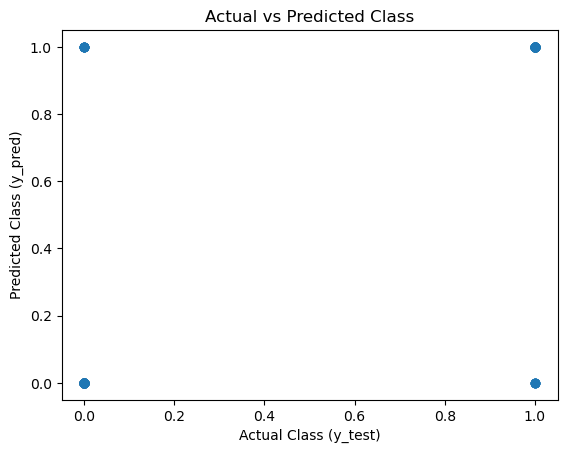

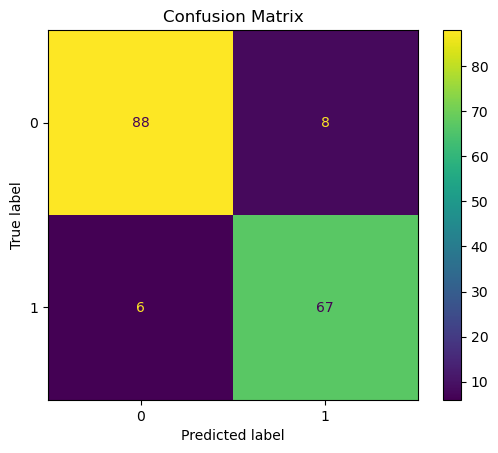

In [44]:
# Scatter plot of y_test vs y_pred
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Class (y_test)")
plt.ylabel("Predicted Class (y_pred)")
plt.title("Actual vs Predicted Class")
plt.show()

# Confusion matrix visualization
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

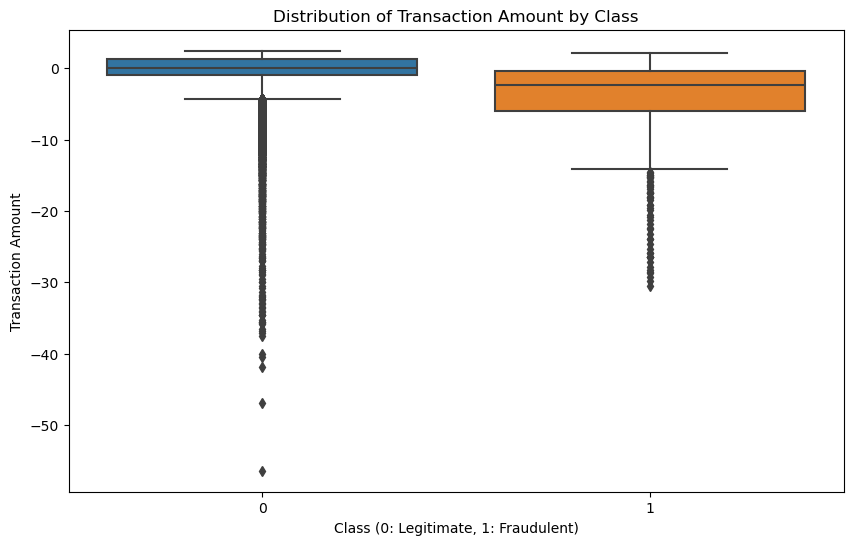

In [45]:
# Distribution of transaction amounts for fraudulent and legitimate transactions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='V1', data=df)
plt.title('Distribution of Transaction Amount by Class')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Transaction Amount')
plt.show()

C:\Users\sumed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sumed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\sumed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


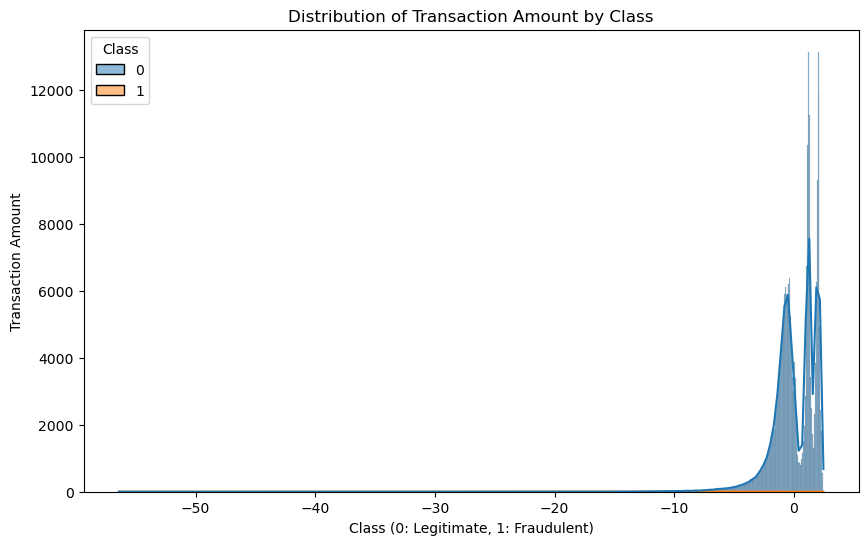

In [48]:
# Distribution of transaction amounts for fraudulent and legitimate transactions
plt.figure(figsize=(10, 6))
# The 'V1' column likely has a very large number of unique values. 
# Consider using a histogram or a more appropriate visualization for this column
sns.histplot(x='V1', data=df, hue='Class', kde=True)  
plt.title('Distribution of Transaction Amount by Class')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Transaction Amount')
plt.show()

# CONCLUSION

The machine learning model developed for credit card fraud detection achieved an accuracy score of approximately 91.72%. The confusion matrix illustrates that out of 169 total transactions, the model correctly identified 88 legitimate transactions and 67 fraudulent transactions. However, it misclassified 8 legitimate transactions as fraudulent (false positives) and 6 fraudulent transactions as legitimate (false negatives).

Although the overall accuracy is fairly high, the presence of both false positives and false negatives indicates that there is room for improvement. In fraud detection, minimizing false negatives is particularly critical, as missing fraudulent cases can lead to significant financial losses. At the same time, false positives may inconvenience customers due to incorrectly flagged transactions.

To improve the model's performance, especially in reducing false negatives, techniques such as further tuning of hyperparameters, exploring alternative algorithms, or balancing the dataset by applying oversampling or undersampling methods can be considered. With these refinements, the model has the potential to provide even more reliable and effective detection of fraudulent transactions, contributing to enhanced financial security.